# Wybór zmiennych

In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import pandas as pd
import numpy as np

## Przypadek dla zmiennych wartościowych

In [2]:
report_value = pd.read_csv("../database/mergedData/Annual_V.csv", index_col=[0])
database = report_value.drop(columns=['Ticker', 'Data']) # Remove Tickers and data
print(f"Wszystkie n={len(database.columns)} cechy: \n")
print(database.columns[2:])

Wszystkie n=54 cechy: 

Index(['Koszty sprzedaży', 'Koszty ogólnego zarządu', 'Zysk ze sprzedaży',
       'Pozostałe przychody operacyjne', 'Pozostałe koszty operacyjne',
       'Zysk operacyjny (EBIT)', 'Przychody finansowe', 'Koszty finansowe',
       'Pozostałe przychody (koszty)', 'Zysk z działalności gospodarczej',
       'Wynik zdarzeń nadzwyczajnych', 'Zysk przed opodatkowaniem',
       'Zysk (strata) netto z działalności zaniechanej', 'Zysk netto',
       'Zysk netto akcjonariuszy jednostki dominującej', 'Aktywa trwałe',
       'Wartości niematerialne i prawne',
       'Rzeczowe składniki majątku trwałego', 'Należności długoterminowe',
       'Inwestycje długoterminowe', 'Pozostałe aktywa trwałe',
       'Aktywa obrotowe', 'Zapasy', 'Należności krótkoterminowe',
       'Inwestycje krótkoterminowe',
       'Środki pieniężne i inne aktywa pieniężne', 'Pozostałe aktywa obrotowe',
       'Aktywa trwałe przeznaczone do sprzedaży', 'Aktywa razem',
       'Kapitał własny akcjonariuszy

## Zmienne agregujące

Zmienne agregujące powszechnie występują w części bilansowej sprawozdanie finansowego (poniżej przedstawiono zmienne agregujące).

* Aktywa razem
  * Aktywa trwałe
    * Wartości niematerialne i prawne
    * Rzeczowe składniki majątku trwałego
    * Aktywa z tytułu prawa do użytkowania
    * Należności długoterminowe
    * Inwestycje długoterminowe
    * Pozostałe aktywa trwałe
  * Aktywa obrotowe
    * Zapasy
    * Należności krótkoterminowe
    * Inwestycje krótkoterminowe
      * Środki pieniężne i inne aktywa pieniężne
    * Pozostałe aktywa obrotowe
    * Aktywa trwałe przeznaczone do sprzedaży


* Pasywa razem
  * Kapitał własny akcjonariuszy jednostki dominującej
    * Kapitał (fundusz) podstawowy
    * Udziały (akcje) własne
    * Kapitał (fundusz) zapasowy

  * Udziały niekontrolujące
  * Zobowiązania długoterminowe
    * Z tytułu dostaw i usług
    * Kredyty i pożyczki
    * Z tytułu emisji dłużnych papierów wartościowych
    * Zobowiązania z tytułu leasingu finansowego
    * Inne zobowiązania długoterminowe
  * Zobowiązania krótkoterminowe
    * Z tytułu dostaw i usług
    * Kredyty i pożyczki
    * Z tytułu emisji dłużnych papierów wartościowych
    * Zobowiązania z tytułu leasingu finansowego
    * Inne zobowiązania krótkoterminowe
    * Rozliczenia międzyokresowe

In [41]:
balance_first_stage = [
    "Aktywa razem", 
    "Pasywa razem",
    ]

balance_second_stage = [
    "Aktywa trwałe",
    "Aktywa obrotowe",
    "Kapitał własny akcjonariuszy jednostki dominującej",
    "Udziały niekontrolujące",
    "Zobowiązania długoterminowe",
    "Zobowiązania krótkoterminowe",
]

balance_third_stage = [
    "Wartości niematerialne i prawne",
    "Rzeczowe składniki majątku trwałego",
    "Należności długoterminowe",
    "Inwestycje długoterminowe",
    "Pozostałe aktywa trwałe",
    "Zapasy",
    "Należności krótkoterminowe",
    "Inwestycje krótkoterminowe",
    "Środki pieniężne i inne aktywa pieniężne",  # four stage
    "Pozostałe aktywa obrotowe",
    "Aktywa trwałe przeznaczone do sprzedaży",
    "Kapitał (fundusz) podstawowy",
    "Udziały (akcje) własne",
    "Kapitał (fundusz) zapasowy",
    "Z tytułu dostaw i usług",
    "Kredyty i pożyczki",
    "Z tytułu emisji dłużnych papierów wartościowych",
    "Zobowiązania z tytułu leasingu finansowego",
    "Inne zobowiązania długoterminowe",
    "Z tytułu dostaw i usług",
    "Kredyty i pożyczki",
    "Z tytułu emisji dłużnych papierów wartościowych",
    "Zobowiązania z tytułu leasingu finansowego",
    "Inne zobowiązania krótkoterminowe",
    "Rozliczenia międzyokresowe",
]

# Remove 
database = database.drop(columns=balance_first_stage + balance_third_stage)

## Korelacja danych 

<Figure size 2000x1000 with 0 Axes>

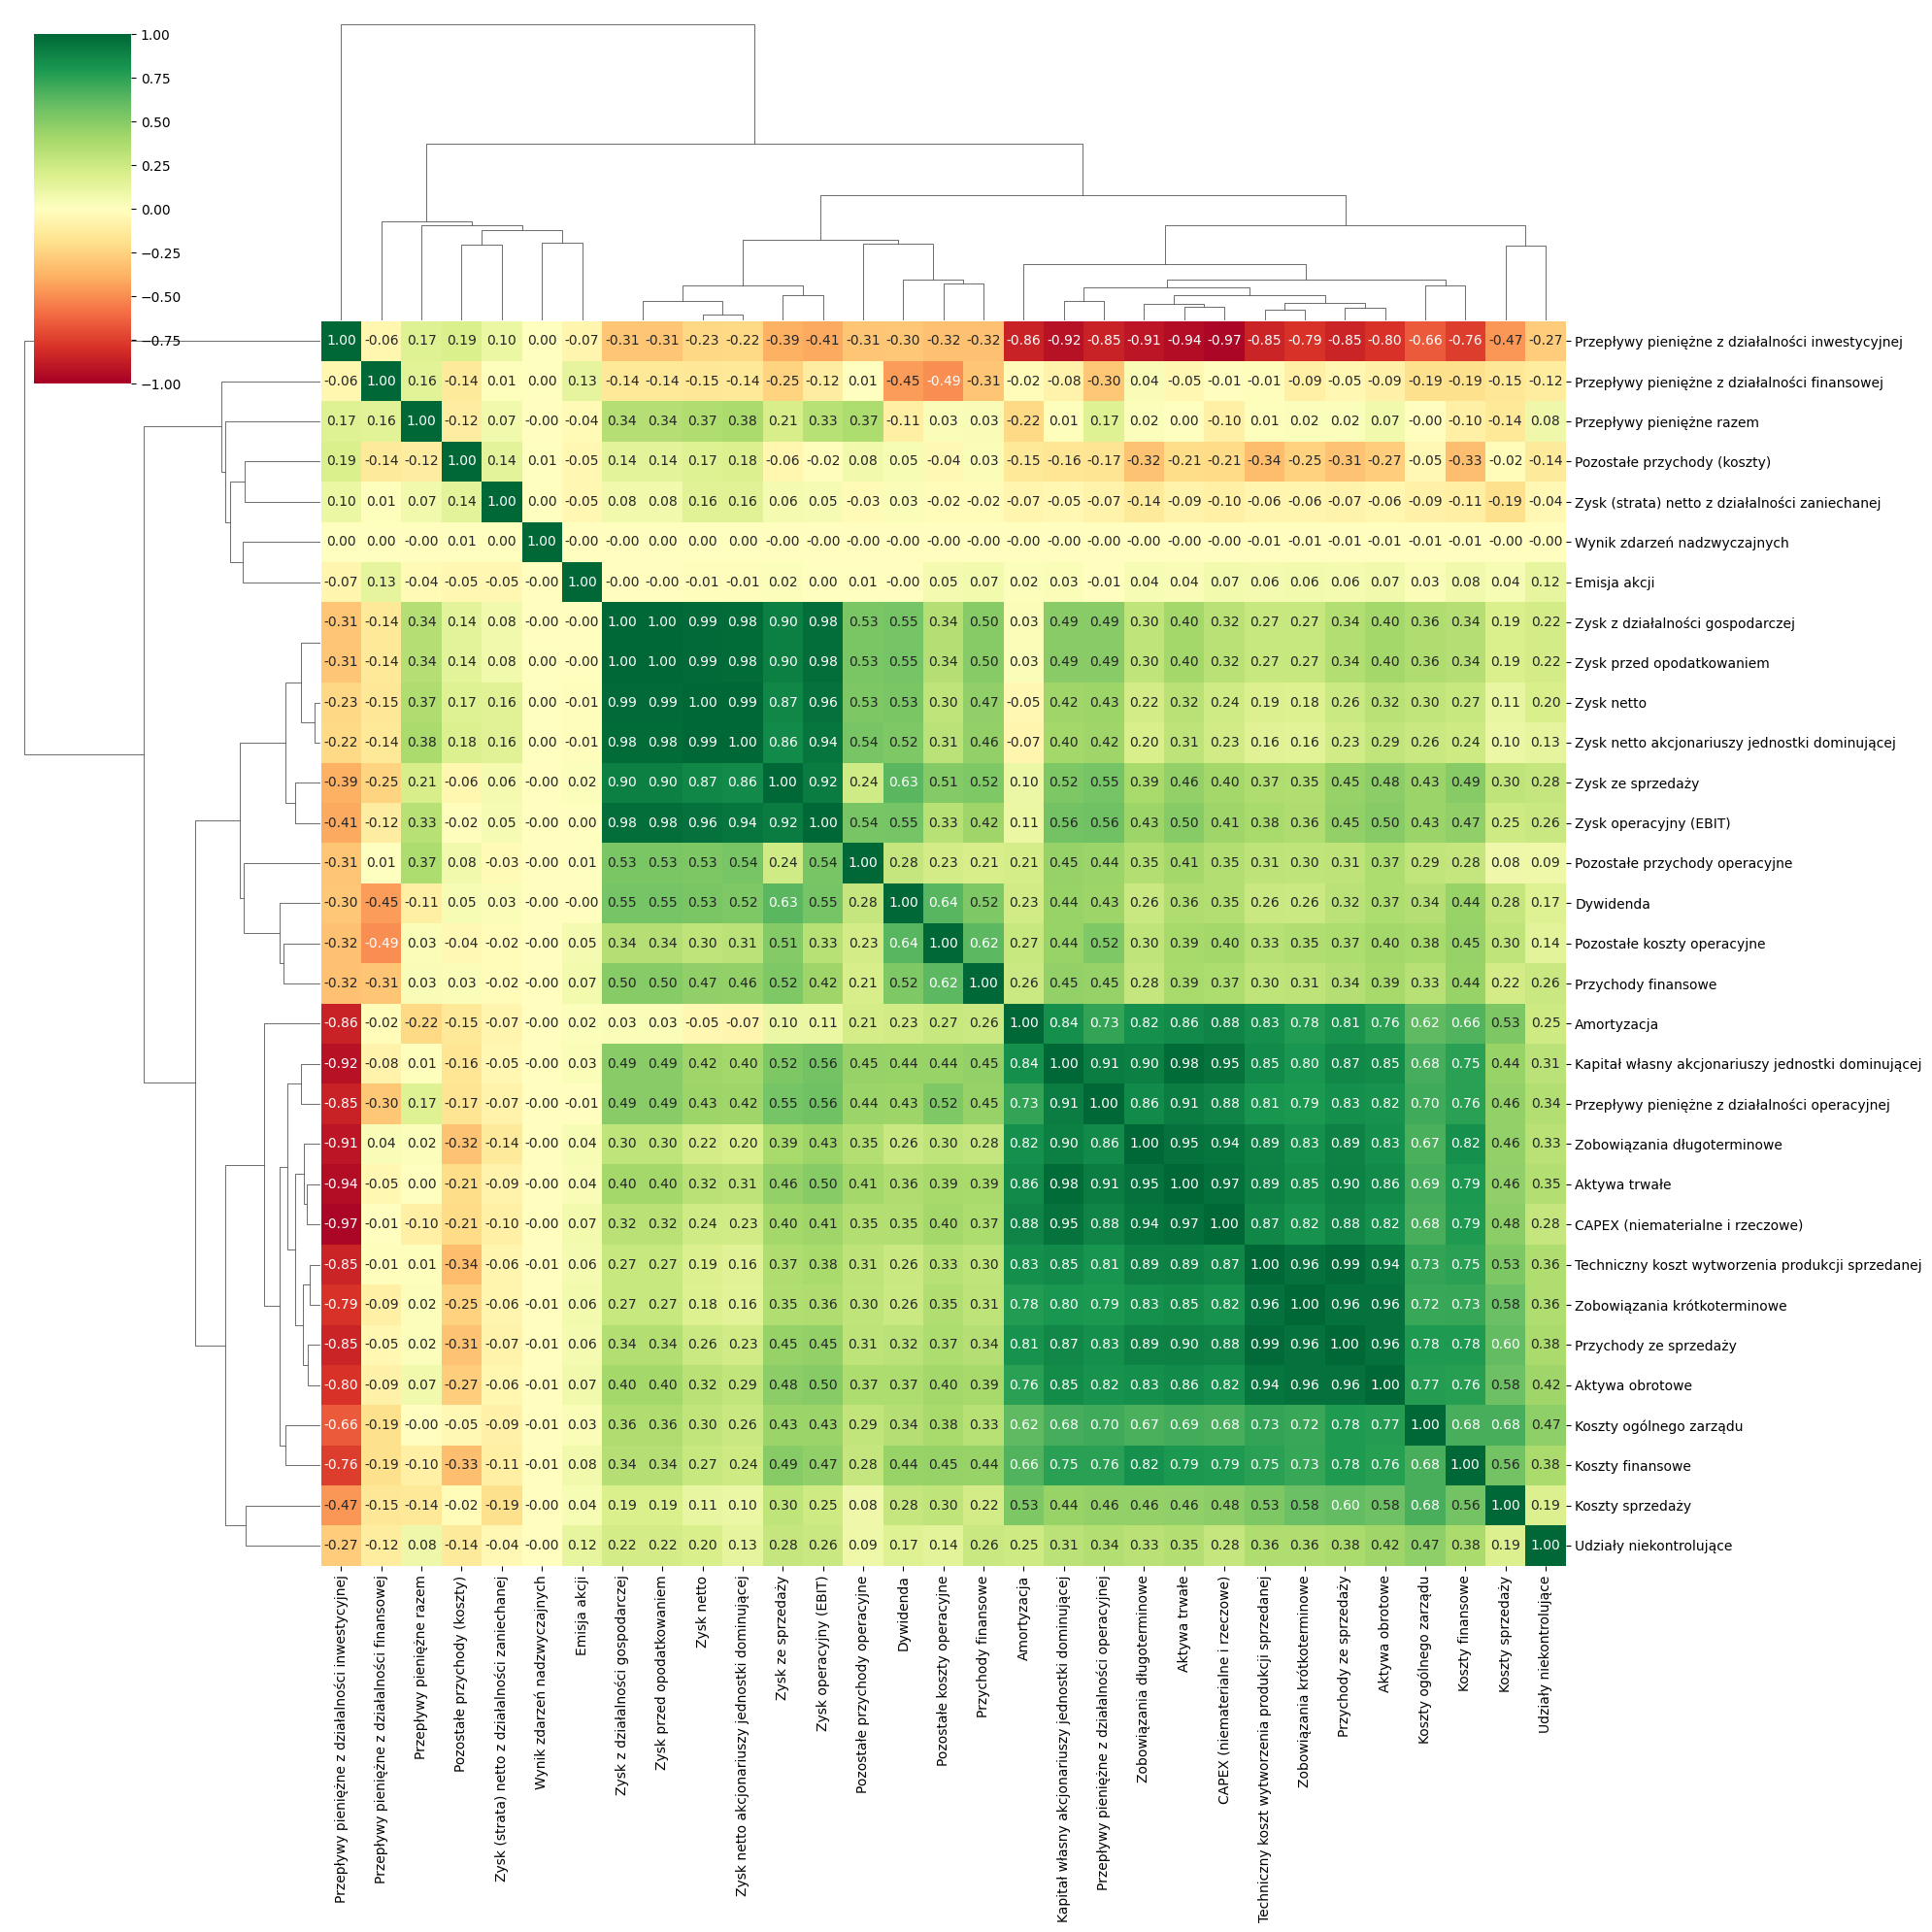

In [42]:
cmap = LinearSegmentedColormap.from_list('', ['blue', 'white', 'blue'])
plt.figure(figsize=(20,10))
sns.clustermap(database.corr(), cmap='RdYlGn', vmin=-1, vmax=1, fmt='.2f', annot=True, figsize=(20, 20))
plt.show()

In [10]:
correlated_data =[         # Data correlated to 'Zysk z działalności gospodarczej',
    'Zysk przed opodatkowaniem',
    'Zysk netto',
    'Zysk netto akcjonariuszy jednostki dominującej',
    'Zysk ze sprzedaży',
    'Zysk operacyjny (EBIT)',
    'Amortyzacja',         # Data correlated to 'Przychody ze sprzedazy'
    'Kapitał własny akcjonariuszy jednostki dominującej',
    'Przepływy pieniężne z działalności operacyjnej',
    'Zobowiązania długoterminowe',
    'Aktywa trwałe',
    'CAPEX (niematerialne i rzeczowe)',
    'Techniczny koszt wytworzenia produkcji sprzedanej',
    'Aktywa obrotowe',
    'Zobowiązania krótkoterminowe',
    'Przepływy pieniężne z działalności inwestycyjnej',
]

database = database.drop(columns=correlated_data)

<Figure size 2000x1000 with 0 Axes>

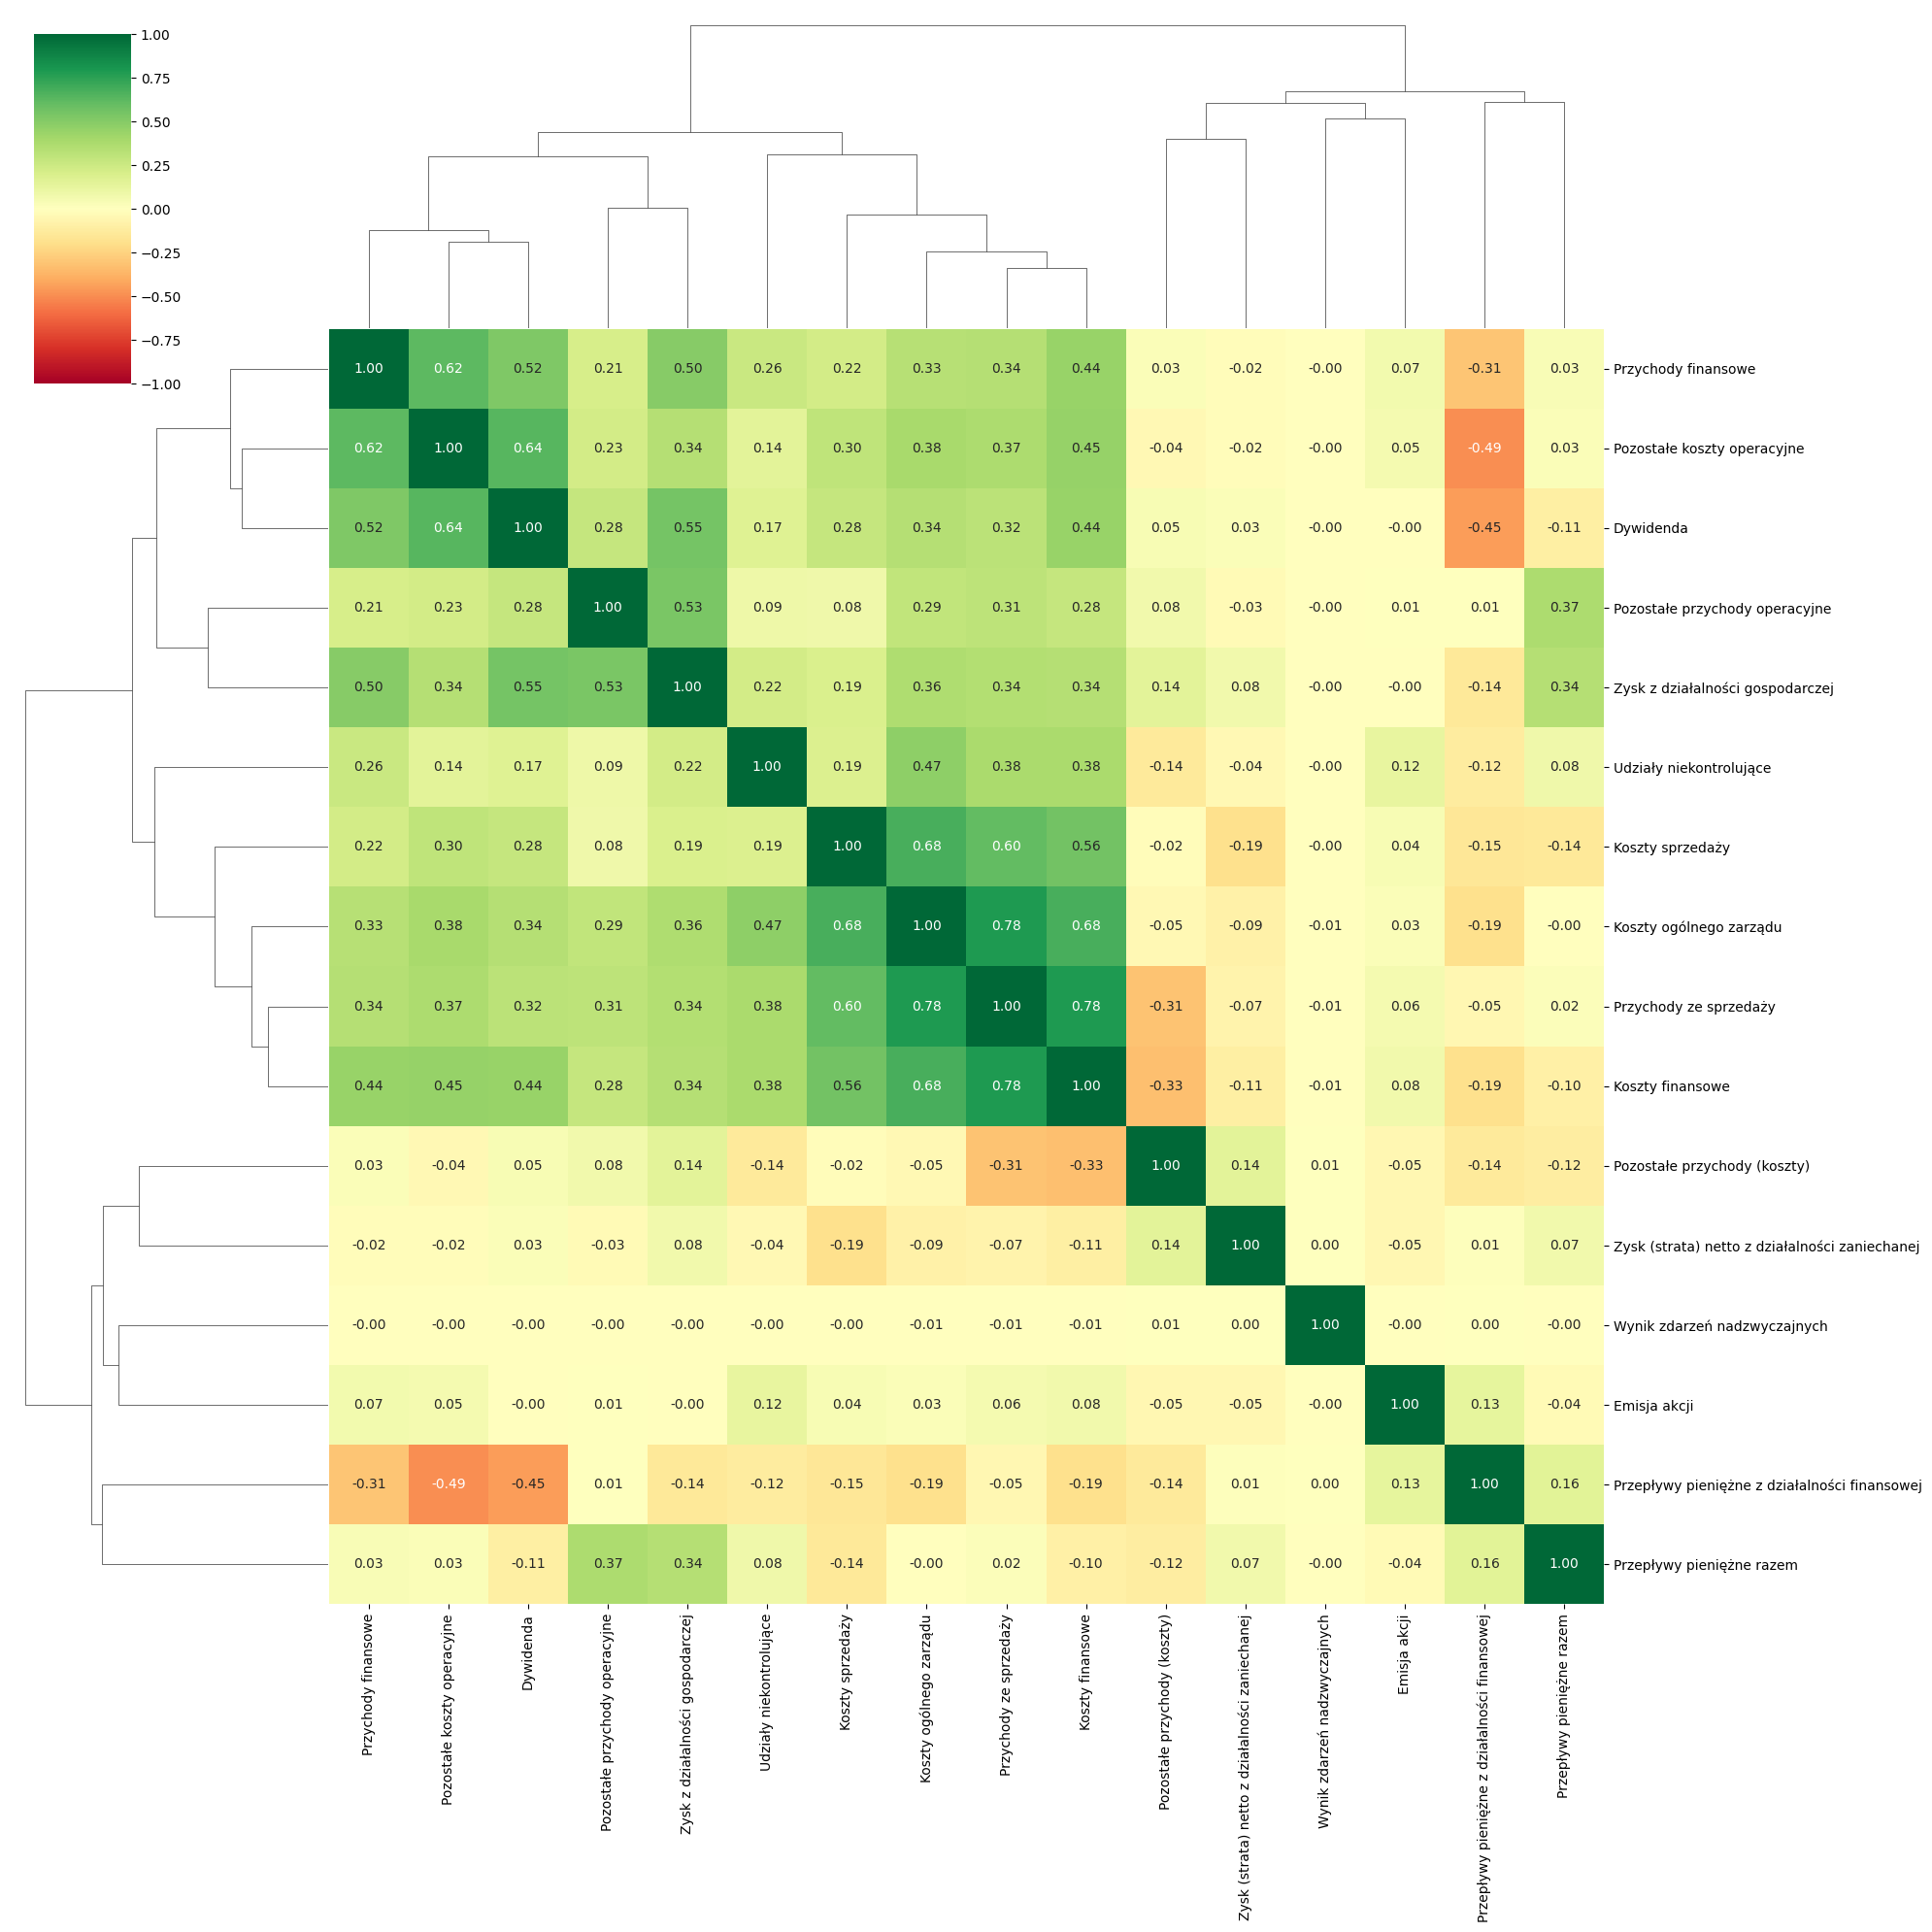

In [11]:
cmap = LinearSegmentedColormap.from_list('', ['blue', 'white', 'blue'])
plt.figure(figsize=(20,10))
sns.clustermap(database.corr(), cmap='RdYlGn', vmin=-1, vmax=1, fmt='.2f', annot=True, figsize=(20, 20))
plt.show()

## Prepare data for test


In [45]:
avg_return = pd.read_csv("../database/mergedData/Annual_AVG_RET.csv", index_col=[0])
database = database.dropna()
avg_return = avg_return.dropna()

concat_database = pd.concat([database, avg_return], axis=1, join="inner") 
concat_database["AVG_7D"] = pd.cut(concat_database["AVG_7D"], bins=[-np.inf, 0.0, np.inf], labels=[-1, 1])
concat_database["AVG_14D"] = pd.cut(concat_database["AVG_14D"], bins=[-np.inf, 0.0, np.inf], labels=[-1, 1])
concat_database["AVG_21D"] = pd.cut(concat_database["AVG_21D"], bins=[-np.inf, 0.0, np.inf], labels=[-1, 1])

In [15]:
from sklearn.model_selection import train_test_split
TARGET = 'AVG_7D'
df_train, df_test = train_test_split(concat_database,
                            train_size=2/3,
                            stratify=concat_database[TARGET])

X_train = df_train.to_numpy()[:,:-3]
y_train = df_train[TARGET].to_numpy()

X_test = df_test.to_numpy()[:,:-3]
y_test = df_test[TARGET].to_numpy()

In [26]:
from sklearn.ensemble import RandomForestClassifier 

rf = RandomForestClassifier(n_estimators = 250,
                            max_depth = 8,
                            n_jobs = -1)
rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=8, n_estimators=250, n_jobs=-1)

ACC = 0.5474339035769828


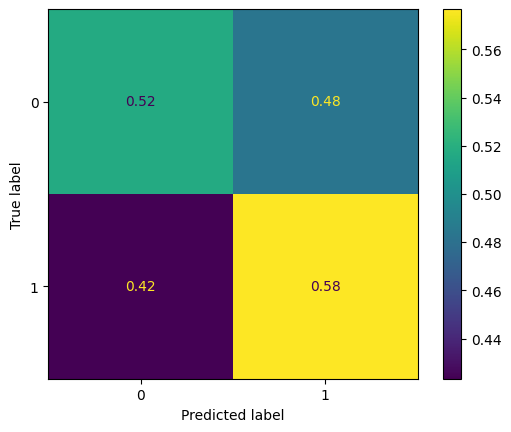

In [27]:
from sklearn import metrics 
y_pred = rf.predict(X_test)

# Jakość klasyfikacji
acc = metrics.accuracy_score(y_test, y_pred)

# Macierz pomyłek
cm = metrics.confusion_matrix(y_test, y_pred, labels=rf.classes_, normalize='true')

print(f"ACC = {acc}")
disp = metrics.ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

In [72]:
mean = np.mean(avg_return["AVG_14D"])
std = np.std(avg_return["AVG_14D"])